# Building Damage Prediction - Alistair Farthing
## Modelling

---

# Contents 
## - Introduction
## - 1 Supervised Learning 
##### - Logistic Regression 
##### - Decision Tree
##### - K Nearest Neighbor
## - 2 Unsupervised Learning
##### - K Means Clustering 
##### - Principal Component Analysis
## - 3 Advanced Modelling
##### - Ensemble Learning 
##### - Neural Network
## - 4 Findings

---

# Introduction 

In this notebook we will implement a number of different machine learning models in order to predict our target variable of building damage. We will use a logistic regression model as a baseline and try to improve our accuracies based on the results from this model.

---

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display='diagram')
pd.set_option('display.max_columns', None)

In [2]:
# pip install tensorflow

In [3]:
# pip install keras

In [4]:
# pip install statsmodels

---

##### Let's start by importing the finalised dataframe from notebook 1

In [5]:
Quakes = pd.read_csv('/Users/alistair/Desktop/QuakesFinal.csv')
# loading in our cleaned data 

##### Now we can define our X and y objects

We will use a new X and y object for each model, we will label each object according to the model we will be running.

In [6]:
X_LR = Quakes.drop(['DAMAGED_vs_NOT_DAMAGED'], axis=1)
y_LR = Quakes['DAMAGED_vs_NOT_DAMAGED']
# LR is for logistic regression

In [7]:
print(X_LR.shape, y_LR.shape)
# we have 38 independent variables and 1 target variable

(762106, 38) (762106,)


In [8]:
display(Quakes.head())
# A quick look at our final dataframe

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_rc,ground_floor_timber,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,other_floor_type_RCC_RB_RBC,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_square,config_T_shape,config_U_shape,DAMAGED_vs_NOT_DAMAGED,LAT,LON
0,1,9,288,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964
1,1,15,364,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27.312392,86.518964
2,1,20,384,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964
3,1,20,312,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964
4,1,30,308,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964


---

# 1 ) Supervised Learning
### 1 a) Logistic Regression

Now that we have conducted our exploratory data analysis and cleaning, we can begin modelling. Our baseline model will be a logistic regression and this is where we will start our modelling journey. If we have truly satisfied the assumptions of Logistic Regression, we should have a fairly good performance with logistic regression right out of the box.

In [9]:
# Taking a chunk for our 20% test set
X_remainder_LR, X_test_LR, y_remainder_LR, y_test_LR = \
    train_test_split(X_LR, y_LR, test_size = 0.2,
                     random_state=69)

In [10]:
# Splitting the remainder in two chunks
X_train_LR, X_validation_LR, y_train_LR, y_validation_LR = \
    train_test_split(X_remainder_LR, y_remainder_LR, test_size = 0.25,
                     random_state=69)

In [11]:
# We are going to be using the MinMax scaler since our data is not normally distributed
scaler = MinMaxScaler()
scaler.fit(X_train_LR)
X_train_scaled_LR = scaler.transform(X_train_LR)
X_test_scaled_LR = scaler.transform(X_test_LR)
X_validation_scaled_LR = scaler.transform(X_validation_LR)

In [12]:
# Initialising a baseline logistic regression
my_logit = LogisticRegression(solver='lbfgs', random_state=69)

In [13]:
my_logit.fit(X_train_scaled_LR, y_train_LR)

LogisticRegression(random_state=69)

In [14]:
print(f'Score on train: {my_logit.score(X_train_scaled_LR, y_train_LR)}')
print(f'Score on test: {my_logit.score(X_validation_scaled_LR, y_validation_LR)}')

Score on train: 0.7402873182391753
Score on test: 0.7404032252773568


### Let's see if a bit of cross validation and C value tweaking can improve our baseline model

The cell below will fit a logistic regression while running a cross validation with five folds on our data. It will do this for both L1 and L2 regularisation. Once it's finished running the scores of every fit will be plotted showing us the optimum score for logistic regression.

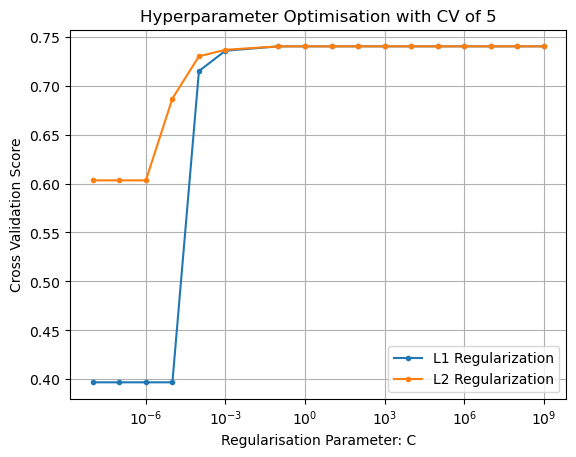

In [15]:
# Range of C values to try for regularization
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Cross-validation scores for L1 regularization
l1_cross_validation_scores = []
for c in C_range:
    pipe = Pipeline([
        ('normalise', MinMaxScaler()),
        ('model', LogisticRegression(penalty='l1', solver='liblinear', C=c, random_state=69))
    ])
    cv_score = np.mean(cross_val_score(pipe, X_remainder_LR, y_remainder_LR, cv=5))
    l1_cross_validation_scores.append(cv_score)

# Cross-validation scores for L2 regularization
l2_cross_validation_scores = []
for c in C_range:
    pipe = Pipeline([
        ('normalise', MinMaxScaler()),
        ('model', LogisticRegression(penalty='l2', solver='lbfgs', C=c, random_state=69))
    ])
    cv_score = np.mean(cross_val_score(pipe, X_remainder_LR, y_remainder_LR, cv=5))
    l2_cross_validation_scores.append(cv_score)

# Plot the results
plt.figure()
plt.plot(C_range, l1_cross_validation_scores, label="L1 Regularization", marker='.')
plt.plot(C_range, l2_cross_validation_scores, label="L2 Regularization", marker='.')
plt.legend()
plt.xscale("log")
plt.title('Hyperparameter Optimisation with CV of 5')
plt.xlabel('Regularisation Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

It looks like both L1 and L2 regularisation perform similarly at the top end of their performance, let's take a closer look at the C-values around the 10 to the 0 mark. Below we will run the same cell but this time taking a shorter range of C-values and examining them at a closer scale.

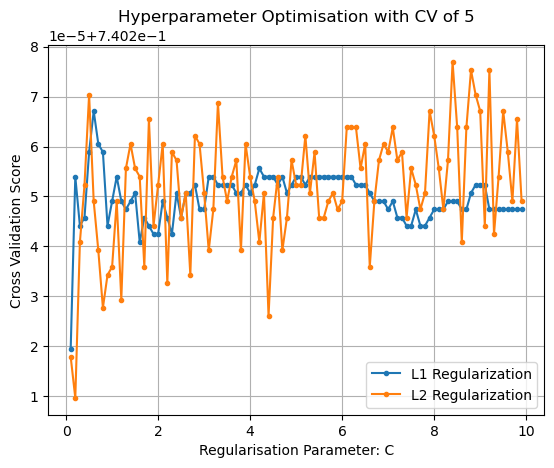

In [16]:
# Here we have a narrower range of C-values and we are fitting with a smaller step size
C_range = np.arange(-1, 10, 0.1)

# Cross-validation scores for L1 regularization
l1_cross_validation_scores = []
for c in C_range:
    pipe = Pipeline([
        ('normalise', MinMaxScaler()),
        ('model', LogisticRegression(penalty='l1', solver='liblinear', C=c, random_state=69))
    ])
    cv_score = np.mean(cross_val_score(pipe, X_remainder_LR, y_remainder_LR, cv=5))
    l1_cross_validation_scores.append(cv_score)

# Cross-validation scores for L2 regularization
l2_cross_validation_scores = []
for c in C_range:
    pipe = Pipeline([
        ('normalise', MinMaxScaler()),
        ('model', LogisticRegression(penalty='l2', solver='lbfgs', C=c, random_state=69))
    ])
    cv_score = np.mean(cross_val_score(pipe, X_remainder_LR, y_remainder_LR, cv=5))
    l2_cross_validation_scores.append(cv_score)

# Plot the results
plt.figure()
plt.plot(C_range, l1_cross_validation_scores, label="L1 Regularization", marker='.')
plt.plot(C_range, l2_cross_validation_scores, label="L2 Regularization", marker='.')
plt.legend()
# plt.xscale("log") we don't need a log scale for this fit
plt.title('Hyperparameter Optimisation with CV of 5')
plt.xlabel('Regularisation Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

The best performance from our model is coming from a C-value of 3.5 with L2 regularisation. Let's fit an optimum logistic regression.

In [17]:
# fitting an optimised logistic regression model
OptimumLR = LogisticRegression(penalty='l2', random_state=69, solver='lbfgs', C=3.5, max_iter=1000000)

In [18]:
OptimumLR.fit(X_train_scaled_LR, y_train_LR);
print(f'Score on train: {OptimumLR.score(X_train_scaled_LR, y_train_LR)}')
print(f'Score on validation: {OptimumLR.score(X_test_scaled_LR, y_test_LR)}')
# printing our optimised scores

Score on train: 0.7403135613421598
Score on validation: 0.7386532127908044


In [19]:
# Get the feature names from the original dataset
feature_names = X_train_LR.columns.tolist()

# Get the coefficients and odds ratios from the logistic regression model
coef = OptimumLR.coef_[0]
odds_ratios = np.exp(coef)

# Create a pandas DataFrame of feature names, coefficients, and odds ratios
LRdf = pd.DataFrame({'Feature Name': feature_names,
                   'Coefficient': coef,
                   'Odds Ratio': odds_ratios})

In [20]:
LRdf
# Now we can take a closer look at the features with the greatest effect on our target variable

,Feature Name,Coefficient,Odds Ratio
0,count_floors_pre_eq,2.196104,8.989923
1,age_building,1.938275,6.946759
2,plinth_area_sq_ft,-1.710652,0.180748
3,height_ft_pre_eq,0.065517,1.067711
4,has_superstructure_adobe_mud,0.093211,1.097693
5,has_superstructure_mud_mortar_stone,0.825675,2.283421
6,has_superstructure_stone_flag,0.039131,1.039907
7,has_superstructure_cement_mortar_stone,-0.077335,0.925580
8,has_superstructure_mud_mortar_brick,-0.086344,0.917278
9,has_superstructure_cement_mortar_brick,-0.675221,0.509044


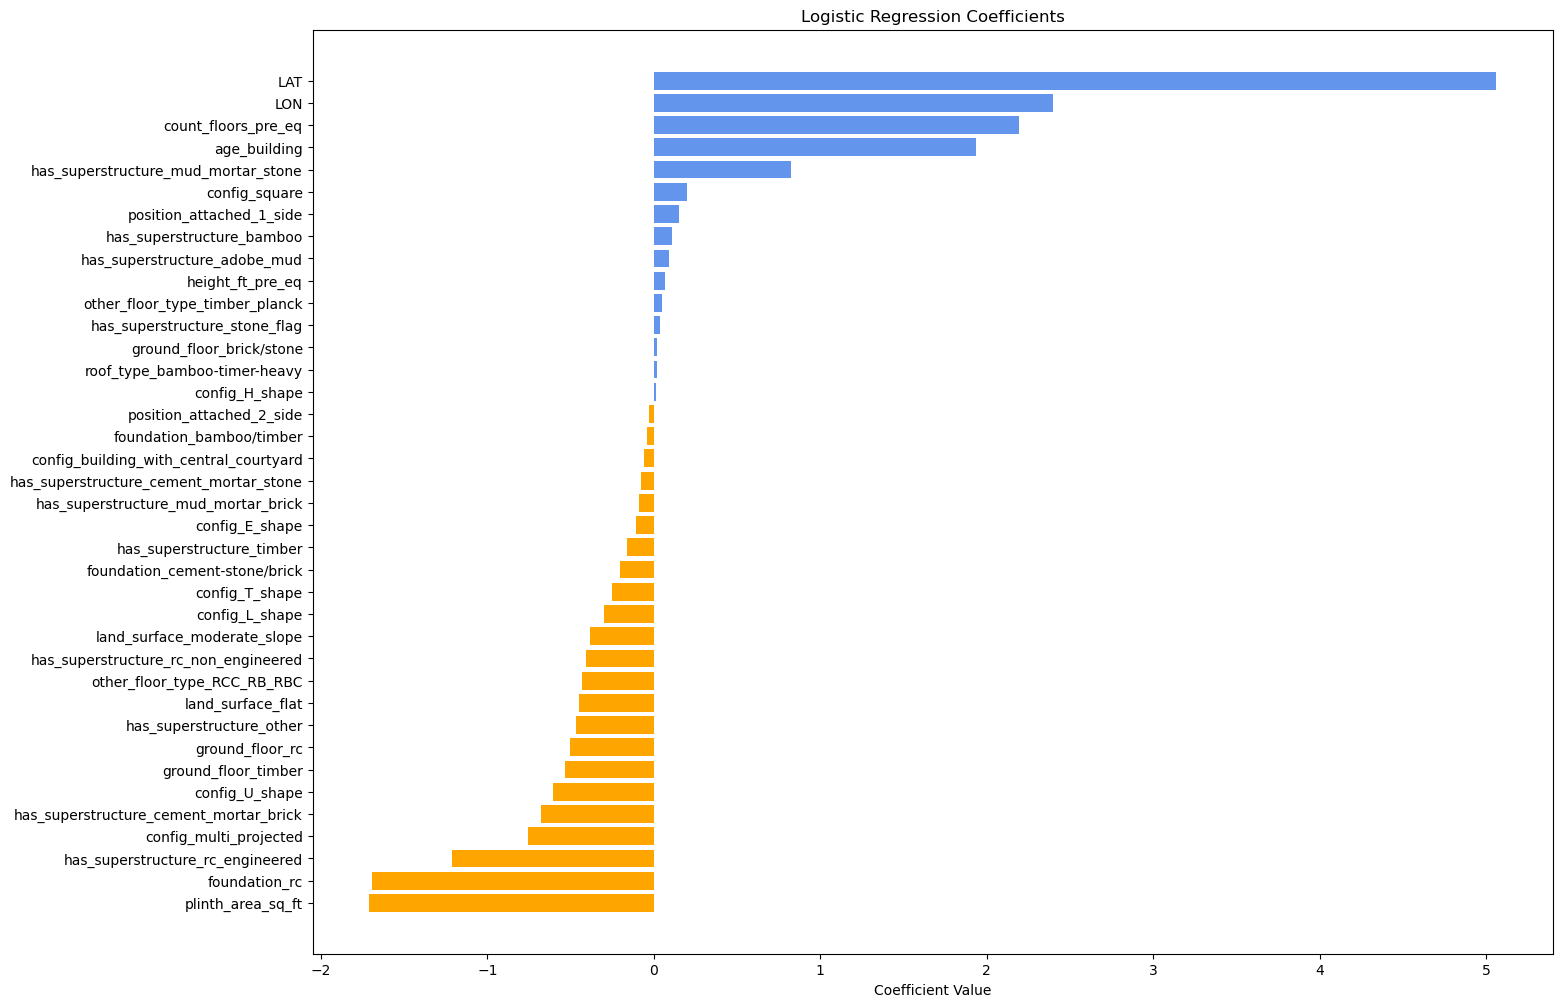

In [21]:
# sort the dataframe by coefficient values
dfsorted = LRdf.sort_values(by='Coefficient')

# plot the coefficients in a bar chart
fig, ax = plt.subplots(figsize=(16, 12))
plt.barh(dfsorted['Feature Name'], dfsorted['Coefficient'], color=['cornflowerblue' if c > 0 else 'orange' for c in dfsorted['Coefficient']])

# set the x-axis label
plt.xlabel('Coefficient Value')

# set the plot title
plt.title('Logistic Regression Coefficients')

# show the plot
plt.show()

We can see that there are a lot of features with negative coefficients and only about a third of features have positive coefficient scores. The strongest coefficient score is the LAT feature, which makes sense to an extent. Since Latitude is storing geospatial data it is a very good predictor of our answer key because the closer to the epicentre and aftershock centres that a building is recorded as being, the more likely it is to be damaged, this makes sense. When we consider log odds or odds ratio of the LAT column things get a little more complicated. It suggests that with every unit of increase in LAT value the odds of predicting a damaged building increases by a particular threshold too. This is only true until we increase the LAT value to the point that we have moved beyond the epicentre or aftershock centre and are moving away from the earthquake.

The feature titled 'count_floors_pre_eq' has a coefficients score of 2.16 and is a good predictor of building damage. This isn't entirely unsurprising if we consider that the taller an object is the less stable it can be when under stress. This feature also has an odds ratio of over 8 which tells us that with every unit of increase in the number of floors our model is 8 times more likely to predict a positive outcome for our target variable.

We have some other features that are good indicators of a damaged building according to our scores. Those are building age, buildings with superstructures of mud and buildings constructed out of timber and bamboo.

Some of the features which have negative coefficient scores and therefore are a good indicator predicting that a building will not be damaged in the event of an earthquake are concrete and cement construction materials as well as plinth size. With an odds ratio of 0.168949 plinth size has the lowest odds ratio score and suggests that with every single unit increase in plinth area we see a 0.16 times increase in the probability of a positive prediction in building damage being made. 

- A building which would be predicted to suffer damage in the event of an earthquake would be old, tall, have a superstructure of mud and floors constructed with wood or timber and of course be located close to the epicentre/aftershock centre.

- A building which would be predicted to withstand an earthquake and suffer less damage would be short, new, have foundations constructed with reinforced concrete, have a superstructure made of engineered reinforced concrete and of course be located far from the epicentre/aftershock centre. 

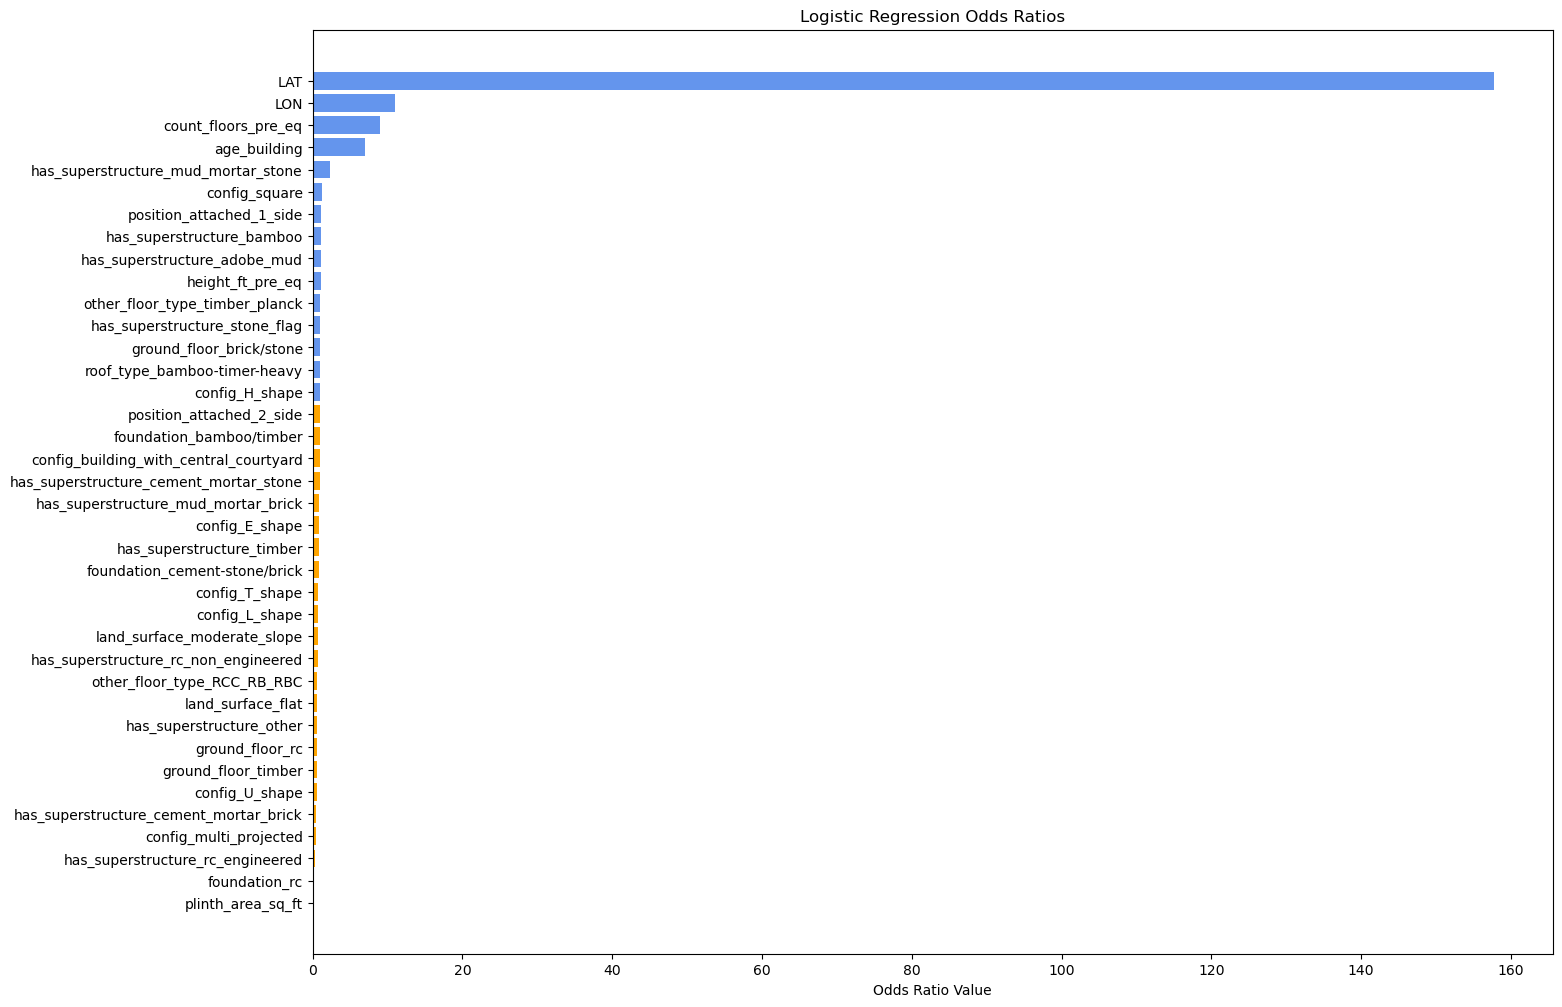

In [22]:
# sort the dataframe by coefficient values
dfsorted = LRdf.sort_values(by='Odds Ratio')

# plot the coefficients in a bar chart
fig, ax = plt.subplots(figsize=(16, 12))
plt.barh(dfsorted['Feature Name'], dfsorted['Odds Ratio'], color=['cornflowerblue' if c > 1 else 'orange' for c in dfsorted['Odds Ratio']])

# set the x-axis label
plt.xlabel('Odds Ratio Value')

# set the plot title
plt.title('Logistic Regression Odds Ratios')

# show the plot
plt.show()

We can remove LAT and LON from the odds ratio to make it more easily interpretible, this isn't detrimental because the discrete value of LAT and LON doesn't translate to odds ratios without its flaws anyway.

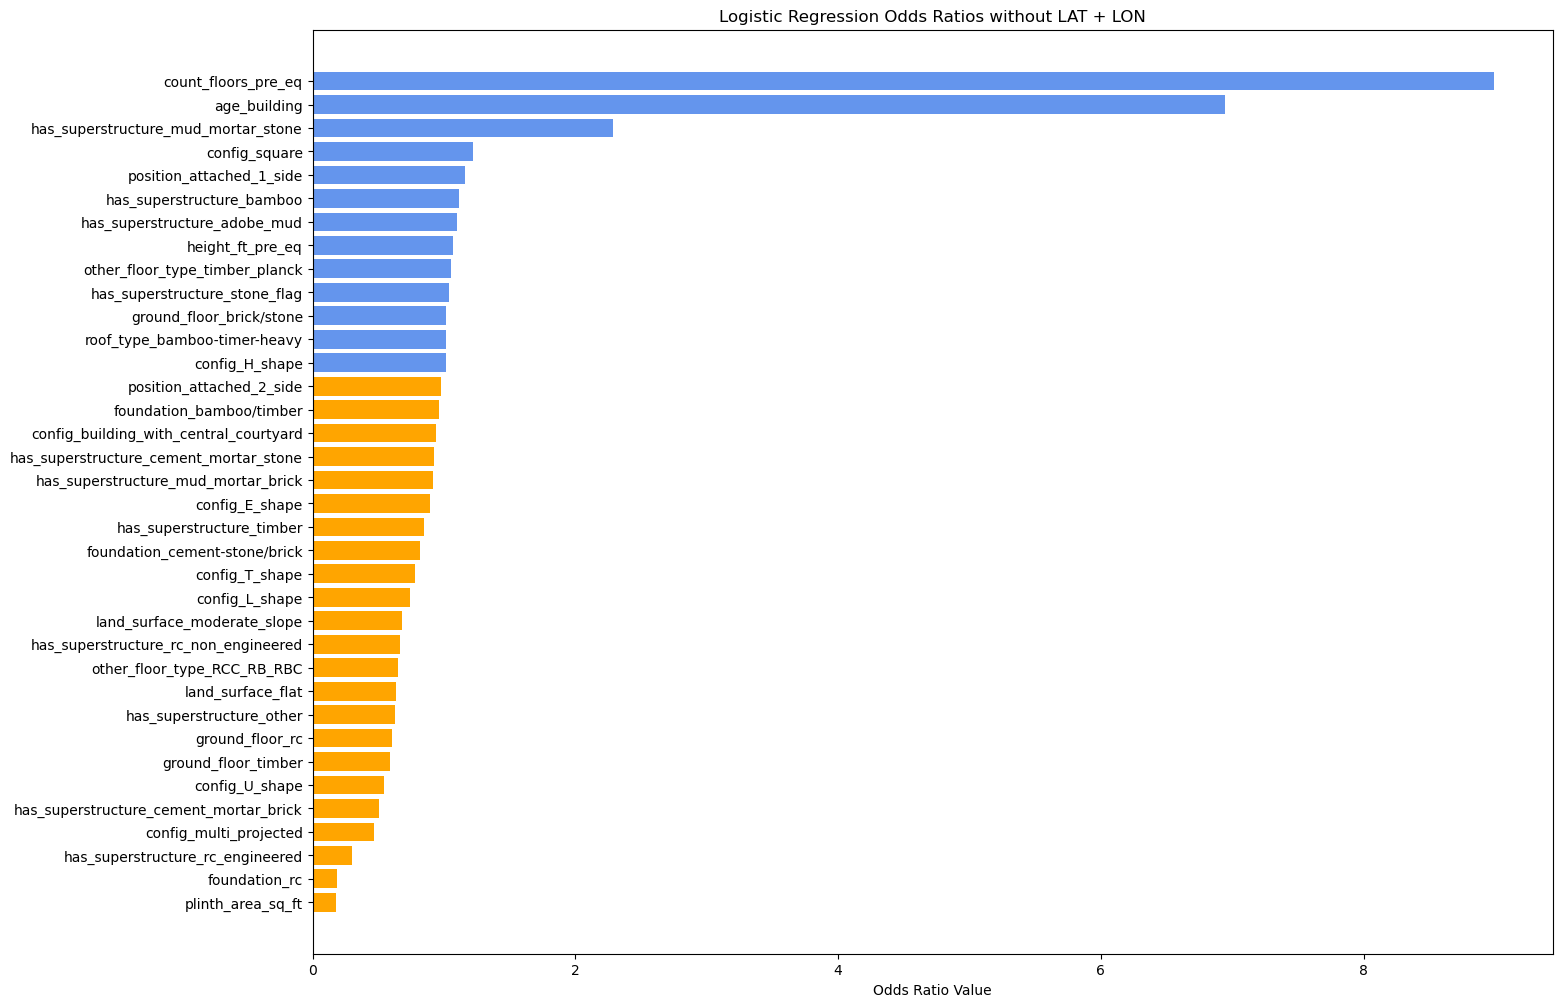

In [23]:
# sort the dataframe by Odds Ratio values
dfsorted = LRdf.drop(index=[36, 37]).sort_values(by='Odds Ratio')

# plot the Odds Ratio in a bar chart
fig, ax = plt.subplots(figsize=(16, 12))
plt.barh(dfsorted['Feature Name'], dfsorted['Odds Ratio'], color=['cornflowerblue' if c > 1 else 'orange' for c in dfsorted['Odds Ratio']])

# set the x-axis label
plt.xlabel('Odds Ratio Value')

# set the plot title
plt.title('Logistic Regression Odds Ratios without LAT + LON')

# show the plot
plt.show()

Our baseline model produced an accuracy of 74% which is not terrible. The idea of the project is to use the data and insights gained to inform future developments and hopefully save lives when another earthquake inevitably strikes. This suddenly makes our 26% error rate seem pretty high, if we are getting a quarter of all predictions wrong, then we are potentially paying for it in human lives. We can create a model with improved accuracies, but we can also fine tune our model based on different evaluation metrics. There are two types of accuracy in binary classification problems, those are:

- Recall, which is the ratio of true positives to the total number of actual positives, and it measures the ability of a model to identify all positive instances.
- Precision, which is the ratio of true positives to the total number of predicted positives, and it measures the ability of a model to correctly identify positive instances.

The way a logistic regression model works is it makes a soft prediction between 0 and 1 on a sample of data , if this soft prediciton is under 0.5 the model classes it's prediction as a 0 and if it is over 0.5 it will classify the prediction as a 1. This threshold can be manipulated and in doing so, the precision and recall will be tweaked slightly (at the cost of overall accuracy).

Since our model is making informed decisions for building developments and the cost of error could theoretically be human life, we want to try and optimise the precision accuracy while maintaining a good level of overall accuracy, let's investigate our accuracy metrics.

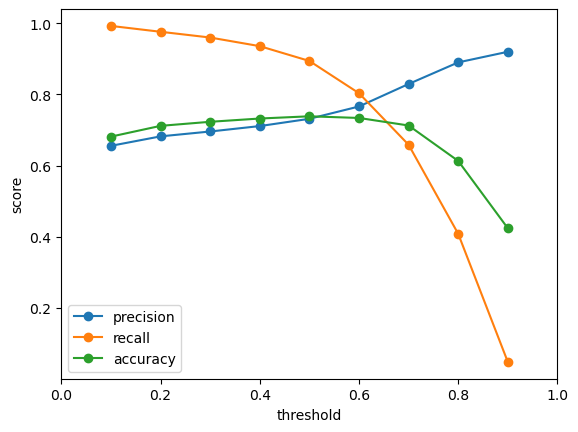

In [24]:
# Train a logistic regression model
ThreshLog = LogisticRegression(penalty='l2', random_state=69, solver='lbfgs', C=2.5, max_iter=1000000)
ThreshLog.fit(X_train_scaled_LR, y_train_LR)

# Calculate probabilities and predictions for the validation set
y_proba_LR = ThreshLog.predict_proba(X_test_scaled_LR)[:, 1]
y_pred_LR = np.where(y_proba_LR > 0.5, 1, 0)

# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds_LR = np.arange(0.1, 1, 0.1)

precisions_LR = []
recalls_LR = []
accuracies_LR = []

for threshold in thresholds_LR:

    # Apply threshold
    y_threshold_LR = np.where(y_proba_LR > threshold, 1, 0)
    
    # Calculate precision, recall, and accuracy
    precision_LR = precision_score(y_test_LR, y_threshold_LR)
    recall_LR = recall_score(y_test_LR, y_threshold_LR)
    accuracy_LR = accuracy_score(y_test_LR, y_threshold_LR)
    
    # Append to lists
    precisions_LR.append(precision_LR)
    recalls_LR.append(recall_LR)
    accuracies_LR.append(accuracy_LR)

    
    
LR_results_dict = {'Threshold' : thresholds_LR,
                    'Precision': precisions_LR,
                'Recall': recalls_LR,
                'Accuracy': accuracies_LR}

# Create a pandas dataframe from the dictionary
LR_results_df = pd.DataFrame(LR_results_dict)

# Visualize the result

plt.figure()
plt.plot(thresholds_LR, precisions_LR, label='precision', marker='o')
plt.plot(thresholds_LR, recalls_LR, label='recall', marker='o')
plt.plot(thresholds_LR, accuracies_LR, label='accuracy', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

Looking at the plot above, the accuracy starts to drop off around the 0.65 classification threshold and the precision line rises at a faster rate than the dropoff of accuracy. This means that we can adjust our classification threshold to around the 0.6 mark and not suffer much loss in accuracy but gain a few percentages in precision. The table below contains all evaluation metrics at all classification thresholds.

In [25]:
# Optimised LR model accuracy metrics at various thresholds
LR_results_df

,Threshold,Precision,Recall,Accuracy
0,0.1,0.655709,0.992682,0.681581
1,0.2,0.682311,0.976216,0.711839
2,0.3,0.695955,0.960055,0.723255
3,0.4,0.711232,0.935802,0.732427
4,0.5,0.731638,0.894202,0.738666
5,0.6,0.766295,0.803531,0.734002
6,0.7,0.829482,0.658637,0.712778
7,0.8,0.890208,0.408381,0.613238
8,0.9,0.920000,0.048341,0.424145


Our baseline model with a classification threshold of 0.5 has an accuracy of 74%, let's explore some other classification models to find better performance.

---

# 1 ) Supervised Learning
### 1 b) Decision Tree

Decision tree models are popular in machine learning due to their interpretability, non-parametric nature, and ability to handle various data types and structures. They can be used for both classification and regression tasks, are computationally efficient, and can be trained on large datasets with high dimensionality. Overall, decision tree models offer a powerful tool for a wide range of machine learning tasks with several advantages over other methods. We will be using the classification decision tree model for the problem at hand.

We will start by fitting a decision tree with a max depth of 5, after this we will have a baseline to evaluate against and we can begin our hyperparameter optimisation.

In [26]:
X_DT = Quakes.drop(['DAMAGED_vs_NOT_DAMAGED'], axis=1)
y_DT = Quakes['DAMAGED_vs_NOT_DAMAGED']
# We are defining new X and y objects for our Decision Tree modelling 

In [27]:
# Taking a chunk for our 20% test set
X_remainder_DT, X_test_DT, y_remainder_DT, y_test_DT = \
    train_test_split(X_DT, y_DT, test_size = 0.2,
                     random_state=69)

In [28]:
# Splitting the remainder in two chunks
X_train_DT, X_validation_DT, y_train_DT, y_validation_DT = \
    train_test_split(X_remainder_DT, y_remainder_DT, test_size = 0.25,
                     random_state=69)

In [29]:
# Again we are using a MinMax scaler because our data is not normally distributed
# Scaling data for a decision tree model doesn't make a huge amount of difference
scaler = MinMaxScaler()
scaler.fit(X_train_DT)
X_train_scaled_DT = scaler.transform(X_train_DT)
X_test_scaled_DT = scaler.transform(X_test_DT)
X_validation_scaled_DT = scaler.transform(X_validation_DT)

In [30]:
# fitting a decision tree with no optimisation
my_dt = DecisionTreeClassifier(max_depth=5)
my_dt.fit(X_train_scaled_DT, y_train_DT)
print(f'The DecisionTree Train accuracy is: {my_dt.score(X_train_scaled_DT, y_train_DT)}')
print(f'The DecisionTree Test accuracy is: {my_dt.score(X_test_scaled_DT, y_test_DT)}')

The DecisionTree Train accuracy is: 0.7495686289946923
The DecisionTree Test accuracy is: 0.7483106113290733


Our decision tree model straight out of the box is already performing better than our optimised logistic regression model, let's see how far we can push the performance of our tree model.

Best validation scores given by:
    Depth  Train Score  Validation Score
12     13     0.801729          0.786578 




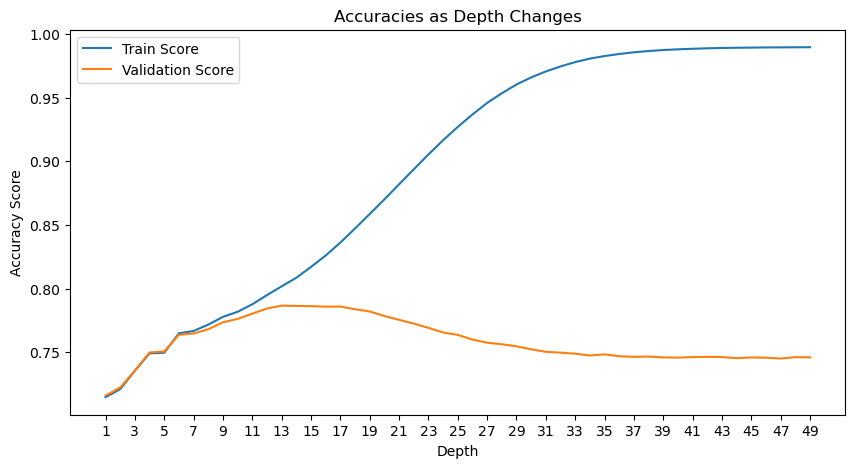

In [31]:
# creating an empty dataframe to populate with our model's scores at different depths
scores = pd.DataFrame()

# setting a depth range of 50 to explore
depth_range = 50

# loop through the max depth values
for max_depth in range(1, depth_range):
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train_scaled_DT, y_train_DT)
    
    # scoring
    train_score = dt_model.score(X_train_scaled_DT, y_train_DT)
    validation_score = dt_model.score(X_validation_scaled_DT, y_validation_DT)
    
    # append the dictionary keys with the values at each iteration
    append_dict = {'Depth': max_depth, 'Train Score': train_score, 'Validation Score': validation_score}
    temp = pd.DataFrame({k:[v] for k,v in append_dict.items()})
    scores = pd.concat([scores,temp],ignore_index=True)    
        
# best parameter
best_score = scores['Validation Score'].max()
print("Best validation scores given by:")
print(scores[scores['Validation Score'] == best_score], "\n\n")

# comparison plot
plt.figure(figsize=(10,5))
plt.plot('Depth', 'Train Score', data=scores)
plt.plot('Depth', 'Validation Score', data=scores)
plt.title('Accuracies as Depth Changes')
plt.xlabel('Depth')
plt.xticks(range(1,depth_range, 2))
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

Looking at the plot above, we can see that our model performance peaks for our validation set around the depth of 15, this is supported by the printed statement above as well as the dataframe below which is pulling the same data for its output. Beyond a depth of 15 the accuracy of our validation set begins to drop off and the accuracy of the training set continues to climb. This is because our model has more opportunity to create a pure tree, where every piece of data is split into its own decision node. The more decision splits there are, the better the model learns the training data, this would be an example of overfitting.

In [32]:
scores.sort_values('Validation Score', ascending=False).head(5)

,Depth,Train Score,Validation Score
12,13,0.801729,0.786578
13,14,0.808500,0.786348
14,15,0.816998,0.786191
16,17,0.836127,0.785876
15,16,0.825956,0.785784


Here are our top 5 performing depths for our DT model, there may be some slight deviation from validation to test set so we will try a selection of these before determining our optimum model.

In [33]:
# fitting and printing scores of our manually optimised DT model
Optimum_DT = DecisionTreeClassifier(max_depth=14)
Optimum_DT.fit(X_train_scaled_DT, y_train_DT)
print(f'The DecisionTree Train accuracy is: {Optimum_DT.score(X_train_scaled_DT, y_train_DT)}')
print(f'The DecisionTree Test accuracy is: {Optimum_DT.score(X_test_scaled_DT, y_test_DT)}')

The DecisionTree Train accuracy is: 0.8084734605686443
The DecisionTree Test accuracy is: 0.786185721221346


As expected, our test set actually performs slightly better at a max depth of 14 rather than 15. Let's see if we can optimise our model further to improve accuracy.

In [34]:
# Define the hyperparameter space
param_grid = {'max_depth': np.arange(1, 50),
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': ['sqrt', 'log2', None]}

# Define the KNN model
dt_model = DecisionTreeClassifier()

# Define the grid search object
grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=5)

# Fit the grid search object to the scaled data
grid_search.fit(X_train_scaled_DT, y_train_DT)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_scaled_DT, y_test_DT)
print("Accuracy of best model: {:.2f}".format(accuracy))

Best hyperparameters:  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy of best model: 0.79


In [35]:
# fitting and printing scores of our DT model optimised through GridSearch
FINAL_DT = DecisionTreeClassifier(max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=5)
FINAL_DT.fit(X_train_scaled_DT, y_train_DT)
print(f'The DecisionTree Train accuracy is: {FINAL_DT.score(X_train_scaled_DT, y_train_DT)}')
print(f'The DecisionTree Test accuracy is: {FINAL_DT.score(X_test_scaled_DT, y_test_DT)}')

The DecisionTree Train accuracy is: 0.8156618838611478
The DecisionTree Test accuracy is: 0.7854115547624358


We have optimised a number of hyperparameters using a grid search above, according to the code, the best hyperparameters are 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, with these hyperparameters our model scores an accuracy of 79% as seen above. It may not seem like a huge improvement but we have gained a whole 5% of accuracy compared to our baseline logistic regression model.

In [36]:
# Here we are predicting the probability of the positive class for each instance in the test set 
y_proba_DT = Optimum_DT.predict_proba(X_test_scaled_DT)[:,1]

As we saw earlier, we can optimise our models further by selecting a classification threshold. We can utilise an ROC curve plot to determine the sweet spot. When we fit an ROC curve for a binary classification model, we can visualize the trade-off between the true positive rate and false positive rate for different threshold values. This can help us to select an appropriate threshold value that balances the trade-off between sensitivity (true positive rate) and specificity (true negative rate) for our particular use case.

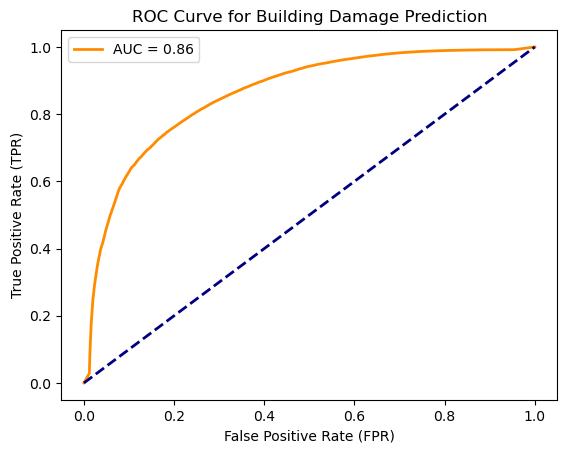

Area under curve (AUC):0.8610518384613908


In [37]:
# We can then plot our false positive and true positive rates at all thresholds
fprs_DT, tprs_DT, thresholds = roc_curve(y_test_DT, y_proba_DT)
roc_auc_DT = roc_auc_score(y_test_DT, y_proba_DT)

plt.figure()
plt.plot(fprs_DT, tprs_DT, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Building Damage Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc_DT}')

An optimal ROC curve would see our curved line fitting tightly into the top left corner. As the line climbs on the Y axis the true positive rate increases which represents the model's ability to correctly identify positive instances, or the percentage of positive instances that the model correctly classified as positive out of all positive instances in the dataset. Conversely, as we move along the X axis the false positive rate (FPR) represents the proportion of actual negative instances that are mistakenly identified as positive by a binary classification model.

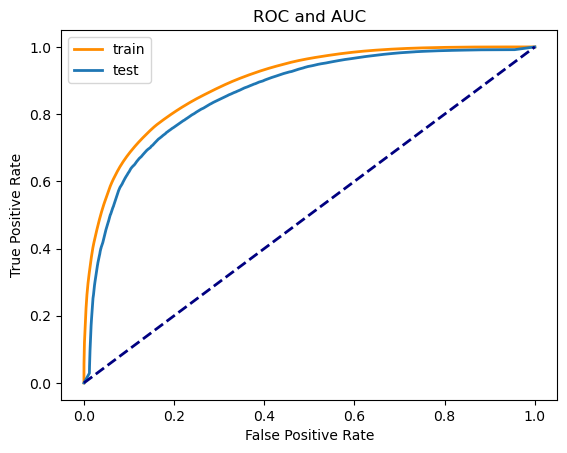

Test AUC score: 0.8610518384613908
Train AUC score: 0.893383560572935


In [38]:
#Get the probability for each point in the train set.
y_proba_train_DT = Optimum_DT.predict_proba(X_train_scaled_DT)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train_DT, tprs_train_DT, thresholds_train_DT = roc_curve(y_train_DT, y_proba_train_DT)
roc_auc_train_DT = roc_auc_score(y_train_DT, y_proba_train_DT)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train_DT, tprs_train_DT, color='darkorange', lw=2, label='train')
plt.plot(fprs_DT, tprs_DT, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_DT}")
print(f"Train AUC score: {roc_auc_train_DT}")

The AUC score is a measure of the overall performance of the model across all possible thresholds, that is, the ability of the model to rank positive instances higher than negative instances. We can plot both the training and test scores as seen above. 

An AUC score of 0.5 would suggest that a model is performing at the same level as random classification, an AUC score of 1 would be a perfect model, correctly identififying all positive instances, this would suggest that our test sets AUC score of 0.861 means our model is performing well.

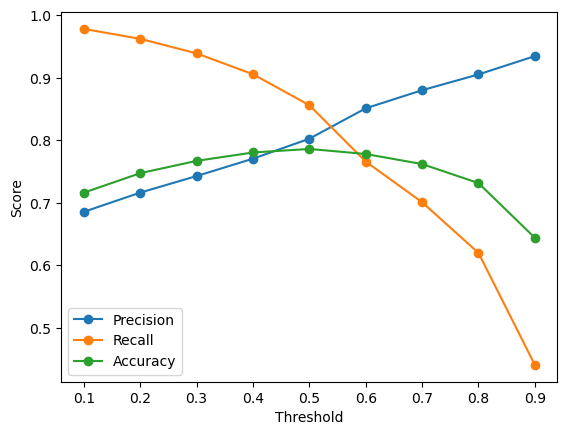

In [39]:
tree_clf = DecisionTreeClassifier(max_depth=15, max_features=None, min_samples_leaf=1, min_samples_split=5)


# Fit the model on the training data
tree_clf.fit(X_train_DT, y_train_DT)

# Set thresholds
thresholds_DT = np.arange(0.1, 1, 0.1)

# Create empty lists to store results
precisions_DT = []
recalls_DT = []
accuracies_DT = []

# Loop over the thresholds
for threshold in thresholds_DT:

    # Predict classes using predict_proba method
    y_proba_DT = tree_clf.predict_proba(X_validation_DT)[:,1]
    y_pred_DT = (y_proba_DT >= threshold).astype(int)

    # Calculate precision, recall, and accuracy
    precision_DT = precision_score(y_validation_DT, y_pred_DT)
    recall_DT = recall_score(y_validation_DT, y_pred_DT)
    accuracy_DT = accuracy_score(y_validation_DT, y_pred_DT)

    # Append results to lists
    precisions_DT.append(precision_DT)
    recalls_DT.append(recall_DT)
    accuracies_DT.append(accuracy_DT)
    
    
DT_results_dict = {'Threshold' : thresholds_DT,
                   'Precision': precisions_DT,
                'Recall': recalls_DT,
                'Accuracy': accuracies_DT}

# Create a pandas dataframe from the dictionary
DT_results_df = pd.DataFrame(DT_results_dict)

# Plot results
plt.plot(thresholds_DT, precisions_DT, label='Precision', marker='o')
plt.plot(thresholds_DT, recalls_DT, label='Recall', marker='o')
plt.plot(thresholds_DT, accuracies_DT, label='Accuracy', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

Just like our logistic regression model, we can make a trade off with overall model accuracy for enhanced model precision. It is important to not get carried away with this type of optimisation, because if we trick our model into predicting everything as a positive classification, our precision would be through the roof but our accuracy would plumit while the model ignores any negative instances.

In [40]:
# Optimised DT model accuracy metrics at various thresholds
DT_results_df

,Threshold,Precision,Recall,Accuracy
0,0.1,0.685685,0.978226,0.716365
1,0.2,0.716398,0.962337,0.747469
2,0.3,0.742878,0.939073,0.767178
3,0.4,0.770667,0.905706,0.780535
4,0.5,0.802631,0.856089,0.786197
5,0.6,0.851269,0.765971,0.778095
6,0.7,0.880161,0.700933,0.762021
7,0.8,0.905424,0.619831,0.731612
8,0.9,0.934737,0.440683,0.644039


The table above contains all evaluation metrics at all classification thresholds. Our decision tree model has an overall better performance than our logistic regression baseline, with a 5% increase in overall accuracy. Let's have a look at a third model to see if we can improve our results further.

# 1 ) Supervised Learning
### 1 c) K Nearest Neighbor

Like Decision Tree modelling, the KNN model is another example of non-parametric model which means that it does not assume a specific functional form for the data and can be used with any type of data. The k-NN algorithm relies on data similarity to make predictions. In the k-NN algorithm, the "k" refers to the number of nearest neighbors to consider when making a prediction. Given a new input data point, the k-NN algorithm will find the k nearest neighbors to that point in the training data, based on a chosen distance metric (such as Euclidean distance). The algorithm then takes the majority class (for classification) or the mean (for regression) of the labels of these k nearest neighbors as the prediction for the new data point.

In [41]:
# Defining new X and y objects for our KNN modelling 
X_KNN = Quakes.drop(['DAMAGED_vs_NOT_DAMAGED'], axis=1)
y_KNN = Quakes['DAMAGED_vs_NOT_DAMAGED']

KNN modelling is computationally heavy, we can work around this simply enough. If we split our data heavily into a remainder and then discard the largest portion, we can then split a train and validation set from our small sample of data. This is what we have done below. This works for optimising our model but when it comes to testing we will have to reconsider which data to use.

In [42]:
# Taking a chunk for our 20% test set
X_remainder_KNN, X_GARBAGE, y_remainder_KNN, y_GARBAGE = \
    train_test_split(X_KNN, y_KNN, test_size = 0.9,
                     random_state=69, stratify=y_KNN)

In [43]:
# to be discarded
y_GARBAGE.shape

(685896,)

In [44]:
# Taking a chunk for our 20% test set
X_train_KNN, X_validation_KNN, y_train_KNN, y_validation_KNN = \
    train_test_split(X_remainder_KNN, y_remainder_KNN, test_size = 0.3,
                     random_state=69, stratify=y_remainder_KNN)

In [45]:
# Now we have a small sample of data for optimising our model
X_validation_KNN.shape

(22863, 38)

In [46]:
# We can plot the runtime of our KNN model against various sample sizes of our already reduced data
# This is not an essential step but it is good to get an understanding of the cost of runnning a model

random.seed(69)

percentage_list = [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
runtimes = {}

for i in percentage_list:    
    obs_samples = int(len(X_train_KNN) * i)
    X_train_subset = X_train_KNN.sample(obs_samples)
    y_train_subset = y_train_KNN.loc[X_train_subset.index]
    
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_subset, y_train_subset)
    end_time = time.time()
    runtime = end_time - start_time
    
    runtimes[i] = runtime

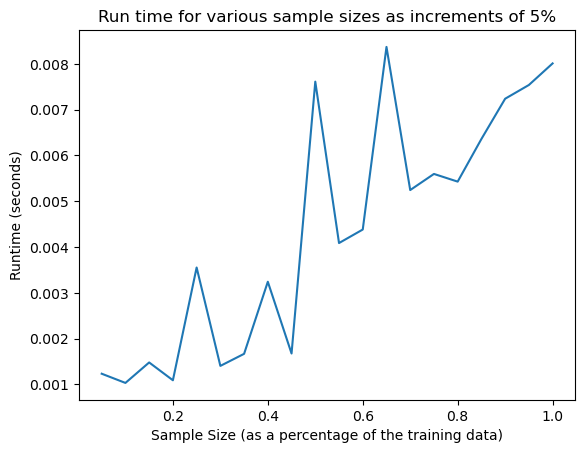

In [47]:
# plot the sample sizes against the runtimes
plt.plot(runtimes.keys(), runtimes.values())
plt.title('Run time for various sample sizes as increments of 5%')
plt.xlabel('Sample Size (as a percentage of the training data)')
plt.ylabel('Runtime (seconds)')
plt.show()

Although the plot seems somewhat irratic, there is an obvious trend, and it's no real surprise that as we use more data to train our model, the run time increases. This is a single model with a K-value of 5, this meanss that the distance between each observation is measured until the model finds it's 5 nearest neighbors. If we were using a range of neighbours combined with different types of distance and the full dataset, our model could end up running for hours.
Now that we have timed the run time for various sample sizes of our data, we can scale and optimise.

In [48]:
# unlike the previous non-parametric model, it is important to scale data for KNN because it's distance based
scaler = MinMaxScaler()
scaler.fit(X_train_KNN)
X_train_KNN_scaled = scaler.transform(X_train_KNN)
X_validation_KNN_scaled = scaler.transform(X_validation_KNN)

In [49]:
neighbors = range(1, 45, 4)
train_acc = []
validation_acc = []
# valis_acc = []
optimal_neighbors = None
optimal_acc = 0

for n in neighbors: 
    print(f"Working on my model with {n} neighbors...", end="\r")
    
    #instantiate and fit
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train_KNN_scaled, y_train_KNN)
    
    #score model
    train_accuracy = KNN_model.score(X_train_KNN_scaled, y_train_KNN)
    validation_accuracy = KNN_model.score(X_validation_KNN_scaled, y_validation_KNN)
#     test_accuracy = KNN_model.score(X_validation_KNN_scaled, y_validation_KNN)
    
    #Append accuracy
    train_acc.append(train_accuracy)
    validation_acc.append(validation_accuracy)
#     test_acc.append(test_accuracy)
    
    # Check if the current model has better accuracy than the previous models
    if validation_accuracy > optimal_acc:
        optimal_acc = validation_accuracy
        optimal_neighbors = n

# Print the optimal number of neighbors and corresponding test accuracy
print(f"Optimal number of neighbors: {optimal_neighbors}")
print(f"Test accuracy with optimal number of neighbors: {validation_acc[neighbors.index(optimal_neighbors)]}")

Optimal number of neighbors: 21ghbors...
Test accuracy with optimal number of neighbors: 0.7690154397935529


We have found an optimal number of neighbors for our model - 21. There are other hyperparameters which will need to be optimised before we can run a fully optimised model. This is a good start, our KNN model, after optimising a single hyperparameter is producing accuracies between an unoptimised and optimised decision tree model. We can feed our data and a range of hyperparameter options into a pipeline and run a Grid Search to do all the leg work for us!

In [50]:
# We can print the lists which were populated during the running of our model.
print(train_acc)
print(validation_acc)

[0.9976755956286202, 0.8310120531613774, 0.8083303653438806, 0.7973831705625434, 0.7926593810336101, 0.7874857067876356, 0.7848988696646484, 0.7814872438937522, 0.7790691135396555, 0.7771383582956868, 0.776182353271974]
[0.7319249442330403, 0.7616235839566111, 0.7677470148274504, 0.7671346717403665, 0.7689279622096837, 0.7690154397935529, 0.7679219699951887, 0.7672658881161702, 0.7672221493242357, 0.7681406639548616, 0.7661286795258715]


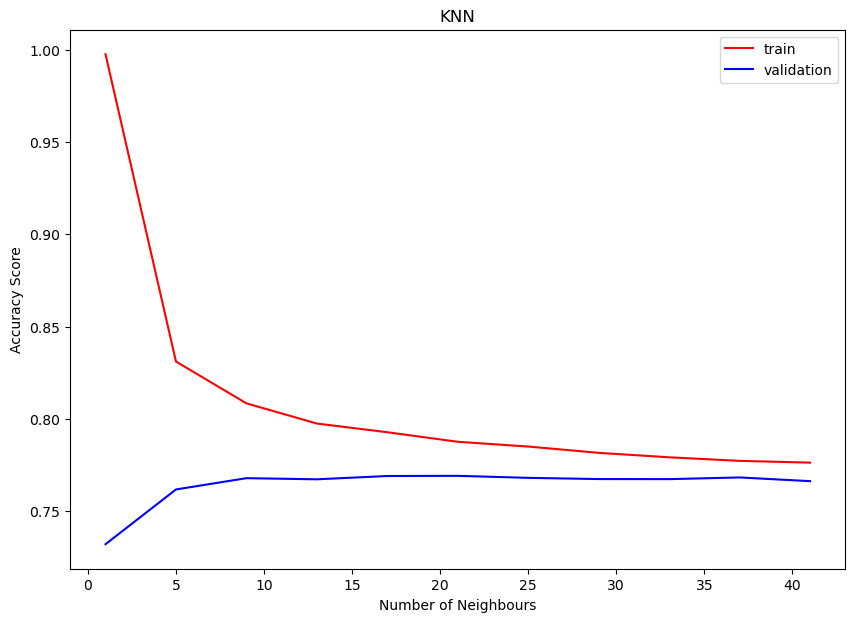

In [51]:
# we can then use these lists to plot a graph displaying model accuracy

plt.figure(figsize=(10,7))
plt.plot(neighbors, train_acc, color="red", label="train")
plt.plot(neighbors, validation_acc, color="blue", label="validation")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neighbours")
plt.title("KNN")
plt.legend()
plt.show()

The left-hand side of the plot is where the model is overfitting to the training data. If it is only allowed to reference the single closest neighbor in order to make it's binary classification then will make very accurate predictions based on the data it learned with, but when new observations are introduced at different points, the model will struggle to classify them. This is why our validation line starts low and increases as a greater number of neighbors are introduced into the model.

In [52]:
# fitting a model with the optimised number of neighbors
KNN_model = KNeighborsClassifier(n_neighbors=21)
KNN_model.fit(X_train_KNN_scaled, y_train_KNN)

KNeighborsClassifier(n_neighbors=21)

In [53]:
# Scoring the model
test_predictions = KNN_model.predict(X_validation_KNN_scaled)
test_accuracy = accuracy_score(test_predictions, y_validation_KNN)
print("Train Accuracy:", KNN_model.score(X_train_KNN_scaled, y_train_KNN))
print(f"Test set accuracy: {test_accuracy}")

Train Accuracy: 0.7874857067876356
Test set accuracy: 0.7690154397935529


That's pretty good. Let's look at some other hyperparams within KNN and then explore the Confusion Matrix. We have optimised one hyperparamter here, but we can go further. If we optimise a number of different hyperparameters we may find that our model's performance changes and we may also discover that with the inclusion of other hyperparameters, our initial optimal model changes slightly, we may need a completely new number of neighbors.

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred_KNN = KNN_model.predict(X_validation_KNN_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation_KNN, y_pred_KNN)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Damaged", "Predicted Damaged"],
    index=["True Non-Damaged", "True Damaged"]
)

display(cf_df)

,Predicted Non-Damaged,Predicted Damaged
True Non-Damaged,5712,3363
True Damaged,1918,11870


As well as evaluating our models based on accuracy we can dive a little deeper and look at the confusion matrix for our model. This gives us an insight into the levels of true and false predictions both negative and positive. Let's take a look at the confusion matrix for our KNN model.

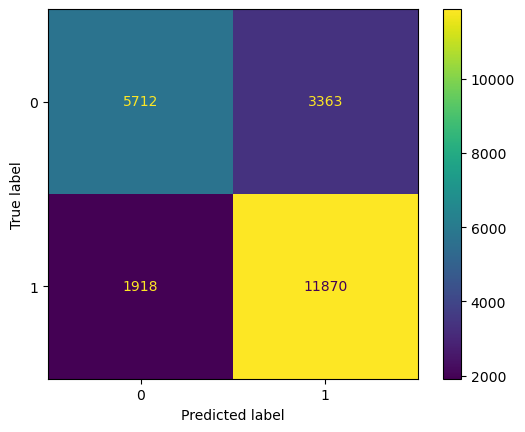

In [56]:
# Display the confusion matrix
plot_confusion_matrix(KNN_model, X_validation_KNN_scaled, y_validation_KNN)

Looking at the plot above, our model is making better predictions than random labelling which is excellent. The imbalanced data from our dataframe appears to have made it easier for our model to predict positive classes compared to negative classes.

In [57]:
# select the FP from the confusion matrix
# true label 0 & predicted label 1
fp = cf_matrix[0, 1]

print(f"{fp} Non-damaged buildings were misclassified as Damaged.")

3363 Non-damaged buildings were misclassified as Damaged.


In [58]:
# select the TP from the confusion matrix
# true label 1 & predicted label 1
tp = cf_matrix[1, 1]

# total number of true label 1
num_damaged = cf_matrix[1, :].sum()

print(f"{tp} Damaged buildings were predicted correctly by the model out of {num_damaged} Damaged buildings.")

11870 Damaged buildings were predicted correctly by the model out of 13788 Damaged buildings.


With our confusion matrix we can actually extract our precision and recall metrics with some simple calculations.

In [59]:
display(cf_df)

,Predicted Non-Damaged,Predicted Damaged
True Non-Damaged,5712,3363
True Damaged,1918,11870


In [60]:
# Calculating the Precision of our model
tp = cf_matrix[1, 1]
predicted_damaged = cf_matrix[:, 1].sum()

precision = tp/predicted_damaged

print(f"Precision = {tp}/{predicted_damaged} = {round(precision*100, 2)}%")

Precision = 11870/15233 = 77.92%


In [61]:
# Calculating the Recall of our model
tp = cf_matrix[1, 1]
true_damaged = cf_matrix[1, :].sum()

recall = tp/true_damaged

print(f"Recall = {tp}/{true_damaged} = {round(recall*100, 2)}%")

Recall = 11870/13788 = 86.09%


There is a more simple way to extract our precision and recall scores with sklearn.metrics

In [62]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_validation_KNN, y_pred_KNN)

0.779229304798792

In [63]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_validation_KNN, y_pred_KNN)

0.8608935306063243

In [64]:
# We can pull out our f1 score 
from sklearn.metrics import f1_score
f1_score(y_validation_KNN, y_pred_KNN)

0.8180283243168739

The F1 score is a common evaluation metric used in machine learning to measure the overall performance of a model. Specifically, the F1 score is a measure of a model's accuracy that combines both precision and recall. The F1 score is the harmonic mean of precision and recall, and it ranges from 0 to 1, with 1 indicating perfect precision and recall. A high F1 score indicates that a model has both high precision and high recall, which means that it is accurately identifying the target class while minimizing false positives and false negatives. 

With an F1 score of 0.82, our model is performing well.

In [65]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_validation_KNN, y_pred_KNN)
print(report_initial)

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      9075
           1       0.78      0.86      0.82     13788

    accuracy                           0.77     22863
   macro avg       0.76      0.75      0.75     22863
weighted avg       0.77      0.77      0.76     22863



Once again we can plot an ROC curve as another evaluation method.

In [66]:
print(X_train_KNN_scaled.shape)
print(X_validation_KNN_scaled.shape)
print(y_train_KNN.shape)
print(y_validation_KNN.shape)

(53347, 38)
(22863, 38)
(53347,)
(22863,)


In [124]:
#Get the probability for each point in the KNN validation set.
y_proba_KNN = KNN_model.predict_proba(X_validation_KNN_scaled)[:,1]

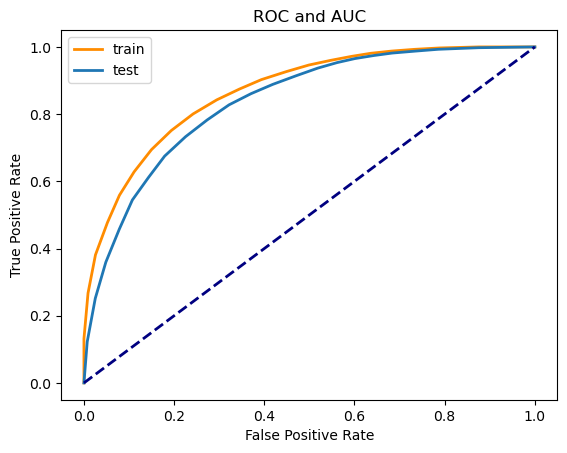

Test AUC score: 0.8373269245984651
Train AUC score: 0.8680243411728432


In [69]:
#Get the probability for each point in the train set.
y_proba_KNN_train = KNN_model.predict_proba(X_train_KNN_scaled)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train_KNN, y_proba_KNN_train)
roc_auc_train = roc_auc_score(y_train_KNN, y_proba_KNN_train)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs_KNN, tprs_KNN, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc_KNN}")
print(f"Train AUC score: {roc_auc_train}")

# The following cell and the markdown which follows it came from another notebook, when pulling it into this notebook I failed to spot the variables had a different name, I didn't want to re-run the cell before submission in case it didn't run in time. Silei said it wouldn't be an issue if we didn't re-run our entire notebooks as long as we have an interpretation of the cell in question. Which I do.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space
param_grid = {
    "n_neighbors": range(1, 21),
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3],
}

# Define the KNN model
knn = KNeighborsClassifier()

# Define the grid search object
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Fit the grid search object to the scaled data
grid_search.fit(X_train_KNN_scaled, y_train_KNN)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_validation_KNN_scaled, y_validation_KNN)
print("Accuracy of best model: {:.2f}".format(accuracy))

Best hyperparameters:  {'n_neighbors': 16, 'p': 1, 'weights': 'distance'}


NameError: name 'X_test_scaled' is not defined

Grid search has provided us with the optimum hyperparameters for our KNN model, this is much easier than manually searching for our best performing model. Now that we know our KNN model performs best with 19 neighbors, 'p' of 1 and weights set to distance, and we get an accuracy score of 79%, let's plug it in to the full data set and see how it perfroms with even more training data!

Now that our GridSearch has finished running, we can run an optimised KNN model with the hyperparameters specified.

In [107]:
# Fitting an optimised KNN model
Optimium_KNN = KNeighborsClassifier(n_neighbors=16, weights='distance', p=1)
Optimium_KNN.fit(X_train_KNN_scaled, y_train_KNN)

KNeighborsClassifier(n_neighbors=16, p=1, weights='distance')

In [108]:
# Scoring the optimised model 
test_predictions = Optimium_KNN.predict(X_validation_KNN_scaled)
test_accuracy = accuracy_score(test_predictions, y_validation_KNN)
print("Train Accuracy:", Optimium_KNN.score(X_train_KNN_scaled, y_train_KNN))
print(f"Test set accuracy: {test_accuracy}")

Train Accuracy: 0.997863047594054
Test set accuracy: 0.7723833267725145


Now that we have the optimum KNN model, let's explore the classification threshold to see if we can further optimise our results.

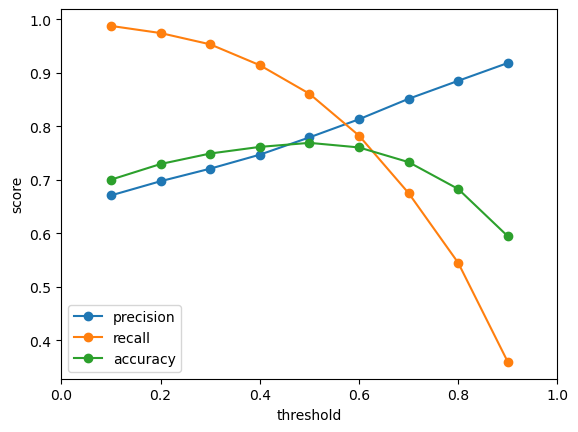

In [125]:
thresholds_KNN = np.arange(0.1, 1, 0.1)

precisions_KNN = list()
recalls_KNN = list()
accuracies_KNN = list()

for threshold in thresholds_KNN:

    # Apply threshold
    y_threshold_KNN = np.where(y_proba_KNN > threshold, 1, 0)
    
    # Calculate precision, recall, and accuracy
    precision_KNN = precision_score(y_validation_KNN, y_threshold_KNN)
    recall_KNN = recall_score(y_validation_KNN, y_threshold_KNN)
    accuracy_KNN = accuracy_score(y_validation_KNN, y_threshold_KNN)
    
    # Append to lists
    precisions_KNN.append(precision_KNN)
    recalls_KNN.append(recall_KNN)
    accuracies_KNN.append(accuracy_KNN)

# Create a dictionary from the lists
KNN_results_dict = {'Threshold' : thresholds_KNN,
                    'Precision': precisions_KNN,
                'Recall': recalls_KNN,
                'Accuracy': accuracies_KNN}

# Create a pandas dataframe from the dictionary
KNN_results_df = pd.DataFrame(KNN_results_dict)

# Visualize the result
plt.figure()
plt.plot(thresholds_KNN, precisions_KNN, label='precision', marker='o')
plt.plot(thresholds_KNN, recalls_KNN, label='recall', marker='o')
plt.plot(thresholds_KNN, accuracies_KNN, label='accuracy', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

In [126]:
# Optimised KNN model accuracy metrics at various thresholds
KNN_results_df

,Threshold,Precision,Recall,Accuracy
0,0.1,0.670721,0.987743,0.700171
1,0.2,0.697270,0.974398,0.729432
2,0.3,0.720733,0.953293,0.749071
3,0.4,0.746889,0.914273,0.761449
4,0.5,0.779229,0.860894,0.769015
5,0.6,0.813174,0.782565,0.760443
6,0.7,0.851432,0.675007,0.732975
7,0.8,0.885078,0.544604,0.682719
8,0.9,0.918413,0.359225,0.594323


# 2 ) Unsupervised Learning
### 2 a) K-Means Clustering

This algorithm works by randomly initializing K cluster centers and iteratively assigning each observation to the nearest cluster center, then recalculating the cluster centers based on the newly assigned observations. This process continues until the cluster assignments no longer change, or until a maximum number of iterations is reached.

We wouldn't ordinarily use K-Means Clustering for a problem like ours, since K-Means Clustering is usually an algorithm used with unlabelled data.

In [76]:
# Convert the dataframe to a numpy array
XKM = Quakes.values

# Scale the data
scaler = StandardScaler()
XKM_scaled = scaler.fit_transform(XKM)

# Determine the number of clusters
k = 2

# Train the model
model = KMeans(n_clusters=k)
model.fit(XKM_scaled)

# Get the cluster assignments
y_pred_KM = model.predict(XKM_scaled)

# Add the cluster assignments to the dataframe
Quakes['Cluster'] = y_pred_KM

In [77]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Load the true labels from a CSV file
y_true_KM = pd.read_csv('/Users/alistair/Desktop/QuakesFinal.csv')['DAMAGED_vs_NOT_DAMAGED'].values

# Calculate the adjusted Rand index
ari = adjusted_rand_score(y_true_KM, y_pred_KM)

# Calculate the normalized mutual information
nmi = normalized_mutual_info_score(y_true_KM, y_pred_KM)

print(f"Adjusted Rand index: {ari}")
print(f"Normalized mutual information: {nmi}")

Adjusted Rand index: -2.681973838428844
Normalized mutual information: 0.13541789456961845


This is not very good. If we were to assign random labels to our data, we would produce a result with a greater accuracy than clustering. Clustering in this instance is 2.5 times less accurate than assigning labels at random.

We can improve our K-Means model by reducing the dimensionality of our data. We will run a PCA on our data and fit our unsupervised model once more.

# 2 ) Unsupervised Learning
### 2 b) Principal Component Analysis

In [78]:
# Redifining our X and y objects
X = Quakes.drop(['DAMAGED_vs_NOT_DAMAGED'], axis=1)
y = Quakes['DAMAGED_vs_NOT_DAMAGED']

In [79]:
# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [80]:
# Instantiate the PCA model
my_PCA = PCA()
my_PCA.fit(X_scaled)

# Transform on our data 
X_PCA = my_PCA.transform(X_scaled)
# X_test_PCA = my_PCA.transform(X_test_scaled)

In [81]:
my_PCA.explained_variance_ratio_

# These are pretty tricky to interpret

array([1.72314720e-01, 1.27786167e-01, 1.18935714e-01, 8.95815824e-02,
       6.96584697e-02, 6.36586003e-02, 4.56103375e-02, 3.92833668e-02,
       3.63561691e-02, 3.16295812e-02, 2.43331191e-02, 2.20812081e-02,
       1.68566543e-02, 1.56835358e-02, 1.50946106e-02, 1.29282866e-02,
       1.24023749e-02, 1.08426264e-02, 1.03263300e-02, 8.89493443e-03,
       7.34263120e-03, 7.11574760e-03, 6.25517905e-03, 6.13784439e-03,
       5.75181638e-03, 5.60238476e-03, 3.48618751e-03, 3.15530651e-03,
       2.90771954e-03, 2.74991154e-03, 2.15586830e-03, 8.22301743e-04,
       6.13271842e-04, 5.92050349e-04, 5.68105031e-04, 2.83510278e-04,
       8.88674627e-05, 6.21150569e-05, 5.07927280e-05])

In [82]:
# We can see which PCs are capturing the greatest variance and proportion of variance 
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")
print(f"Variance captured by PC3: {my_PCA.explained_variance_[2]: 0.3f}")
print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")
print(f"Proportion of variance captured by PC3: {my_PCA.explained_variance_ratio_[2]: 0.3f}")

Variance captured by PC1:  0.356
Variance captured by PC2:  0.264
Variance captured by PC3:  0.246
Proportion of variance captured by PC1:  0.172
Proportion of variance captured by PC2:  0.128
Proportion of variance captured by PC3:  0.119


In [83]:
expl_var = my_PCA.explained_variance_ratio_
# let's plot our variance array to visualise our findings

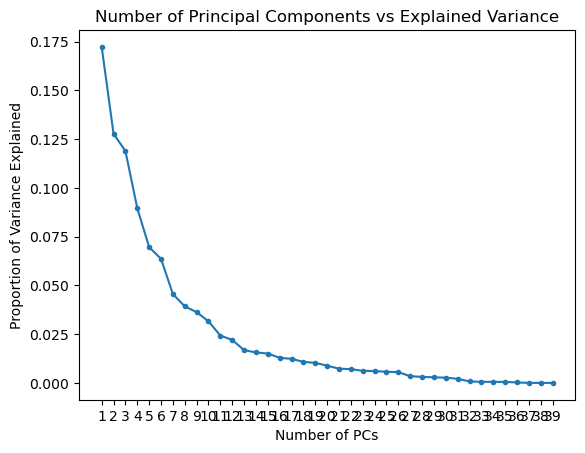

In [84]:
# We can plot our PCs 
plt.figure()
plt.plot(range(1,40),expl_var,marker='.')
plt.title('Number of Principal Components vs Explained Variance')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,40,1))
plt.show()

Ideally this plot would fit tightly into the bottom left corner which would mean that the majority of our data's variance is captured in the first few PCs.

In [85]:
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.17231472, 0.30010089, 0.4190366 , 0.50861818, 0.57827665,
       0.64193525, 0.68754559, 0.72682896, 0.76318513, 0.79481471,
       0.81914783, 0.84122904, 0.85808569, 0.87376923, 0.88886384,
       0.90179212, 0.9141945 , 0.92503712, 0.93536345, 0.94425839,
       0.95160102, 0.95871677, 0.96497195, 0.97110979, 0.97686161,
       0.98246399, 0.98595018, 0.98910549, 0.99201321, 0.99476312,
       0.99691899, 0.99774129, 0.99835456, 0.99894661, 0.99951471,
       0.99979822, 0.99988709, 0.99994921, 1.        ])

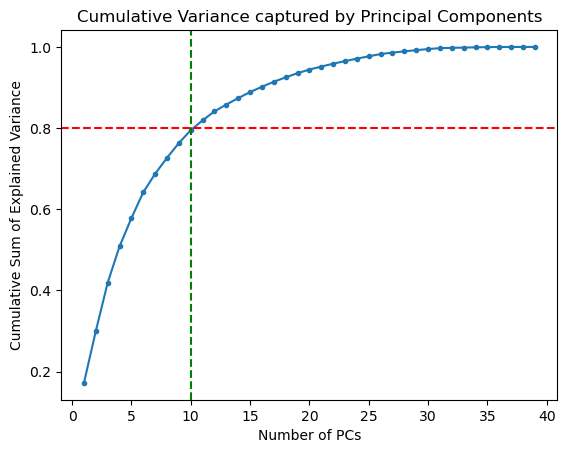

In [86]:
plt.figure()
plt.plot(range(1,40), cumulative_sum, marker='.')
plt.axhline(0.8, c='r', linestyle='--')
plt.axvline(x=10, c='g', linestyle='--')
plt.title('Cumulative Variance captured by Principal Components')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
# plt.xticks(range(1,2744,500))
plt.show()

We are looking to capture around 80% of our data's variance, this can be done with the first 10 PCs according to the plot above. PCA is a good technique for reducing the computational expense of heavy data sets, for this instance it is not entirely essential and the use case of K-Means clustering for this data will probably not be effective anyway.

In [87]:
# Fitting a PCA
my_PCA = PCA(n_components = 10)
my_PCA.fit(X_scaled)

# Transform train and test
X_PCA = my_PCA.transform(X_scaled)
# X_test_PCA = my_PCA.transform(X_test_scaled)

In [88]:
# Let's compare the shapes of our data before and after PCA
print(f'Original X_train: {X.shape}')
print(f'PCA Transformed: {X_PCA.shape}')

Original X_train: (762106, 39)
PCA Transformed: (762106, 10)


In [89]:
# Initialising the model
kmeans = KMeans(n_clusters=2, random_state=69)

In [90]:
# Fitting the model
kmeans.fit(X_PCA)

KMeans(n_clusters=2, random_state=69)

In [91]:
# pulling the model's predictions 
y_pred = kmeans.predict(X_PCA)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [92]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Load the true labels from a CSV file
y_true = pd.read_csv('/Users/alistair/Desktop/QuakesFinal.csv')['DAMAGED_vs_NOT_DAMAGED'].values

# Calculate the adjusted Rand index
ari = adjusted_rand_score(y_true, y_pred)

# Calculate the normalized mutual information
nmi = normalized_mutual_info_score(y_true, y_pred)

print(f"Adjusted Rand index: {ari}")
print(f"Normalized mutual information: {nmi}")

Adjusted Rand index: -1.2634404511880002
Normalized mutual information: 0.13358398545295555


# 3 ) Advanced Modelling
### 3 a) Ensemble Modelling

We have improved our clustering model but it's still not worth persuing any further. The benefits of running a random forest model include:

- High Accuracy: Random Forest models tend to have high accuracy due to their ability to reduce overfitting and handle noisy data.

- Robustness: Random Forest models are considered to be more robust than other machine learning algorithms because they are less sensitive to outliers and noise in the data.

- Feature Importance: Random Forest models can provide information on feature importance, which is helpful in understanding the most important variables that contribute to the outcome.

- Scalability: Random Forest models can handle large datasets with many features and observations, making it suitable for big data applications.

- Versatility: Random Forest models can be used for both classification and regression tasks and can handle both categorical and continuous variables.

- Low Bias: Random Forest models tend to have low bias, meaning that they can capture complex relationships between variables that other models might miss.

- Reduced Risk of Overfitting: Random Forest models can prevent overfitting by using a technique called bagging, which involves generating multiple decision trees and combining their outputs.

In [93]:
# Taking a chunk for our 20% test set
X_remainder_RF, X_test_RF, y_remainder_RF, y_test_RF = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=69)

In [94]:
# Splitting the remainder in two chunks
X_train_RF, X_validation_RF, y_train_RF, y_validation_RF = \
    train_test_split(X_remainder_RF, y_remainder_RF, test_size = 0.25,
                     random_state=69)

In [95]:
# Scaling the data 
scaler = MinMaxScaler()
scaler.fit(X_train_RF)
X_train_scaled_RF = scaler.transform(X_train_RF)
X_test_scaled_RF = scaler.transform(X_test_RF)
X_validation_scaled_RF = scaler.transform(X_validation_RF)

In [96]:
# checking the data type of our y object
print(type(y_train_RF))

<class 'pandas.core.series.Series'>


In [97]:
# converting into an numpy array
y_train_np = y_train_RF.values

In [98]:
# sanity check
print(type(y_train_np))

<class 'numpy.ndarray'>


In [99]:
# sanity check
n_features = X_train_scaled_RF.shape[1]
print(n_features)

39


In [100]:
# determining the input for our RF hyperparameters 
maximum_features = int(np.sqrt(X_train_scaled_RF.shape[1]))
print(maximum_features)
print(int(np.sqrt(X_train_scaled_RF.shape[1])))

6
6


In [101]:
# initialising and fitting the model
random_forest_model = RandomForestClassifier(n_estimators=300, max_features=maximum_features, max_depth = 15, random_state=69)
random_forest_model.fit(X_train_scaled_RF, y_train_np)

RandomForestClassifier(max_depth=15, max_features=6, n_estimators=300,
                       random_state=69)

In [102]:
# Instantiate lists to save scores in
decision_tree_train_scores = []
decision_tree_test_scores = []
# For each tree, score on train and test
for sub_tree in random_forest_model.estimators_:
    decision_tree_train_scores.append(sub_tree.score(X_train_scaled_RF, y_train_RF))
    decision_tree_test_scores.append(sub_tree.score(X_test_scaled_RF, y_test_RF))

# Choosing the metrics that we want our model to spit out
print(f"""
Performance on fitted data:
Average Decision Tree: {np.mean(decision_tree_train_scores)}
Random Forest: {random_forest_model.score(X_train_scaled_RF, y_train_RF)}
----------------
Performance on test data:
Average Decision Tree: {np.mean(decision_tree_test_scores)}
Random Forest: {random_forest_model.score(X_test_scaled_RF, y_test_RF)}
""")


Performance on fitted data:
Average Decision Tree: 0.7741773406843181
Random Forest: 0.7984332867518256
----------------
Performance on test data:
Average Decision Tree: 0.7636053631802933
Random Forest: 0.7836467176654289



Interestingly our optimised decision tree model has out performed our Random Forest model.

# 3 ) Advanced Modelling
### 3 b) Neural Network

Neural Networks are a good choice for binary classification problems because the have the ability to draw non linear decision boundaries which suits the to complex problems. They are also particularly good at learning complex relationships within data that may be missed by other, more simple machine learning models.

In [104]:
# Split your data into input features and target variables
X = Quakes.drop('DAMAGED_vs_NOT_DAMAGED', axis=1).values
y = Quakes['DAMAGED_vs_NOT_DAMAGED'].values

# Encode any categorical variables using one-hot encoding
# ...

# Normalize your input features to have zero mean and unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split your data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=69)

# Define the architecture of your neural network
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the performance of the model on the test set
score = model.evaluate(X_test, y_test)

2023-04-11 06:40:09.077992: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
17148/17148 [==============================] - 8s 416us/step - loss: 0.4754 - accuracy: 0.7661 - val_loss: 0.4652 - val_accuracy: 0.7717
Epoch 2/50
17148/17148 [==============================] - 7s 425us/step - loss: 0.4615 - accuracy: 0.7749 - val_loss: 0.4566 - val_accuracy: 0.7793
Epoch 3/50
17148/17148 [==============================] - 7s 421us/step - loss: 0.4565 - accuracy: 0.7781 - val_loss: 0.4552 - val_accuracy: 0.7793
Epoch 4/50
17148/17148 [==============================] - 7s 427us/step - loss: 0.4530 - accuracy: 0.7799 - val_loss: 0.4550 - val_accuracy: 0.7780
Epoch 5/50
17148/17148 [==============================] - 7s 426us/step - loss: 0.4509 - accuracy: 0.7810 - val_loss: 0.4493 - val_accuracy: 0.7839
Epoch 6/50
17148/17148 [==============================] - 7s 424us/step - loss: 0.4486 - accuracy: 0.7823 - val_loss: 0.4490 - val_accuracy: 0.7845
Epoch 7/50
17148/17148 [==============================] - 7s 420us/step - loss: 0.4466 - accuracy: 0.7834 - val_

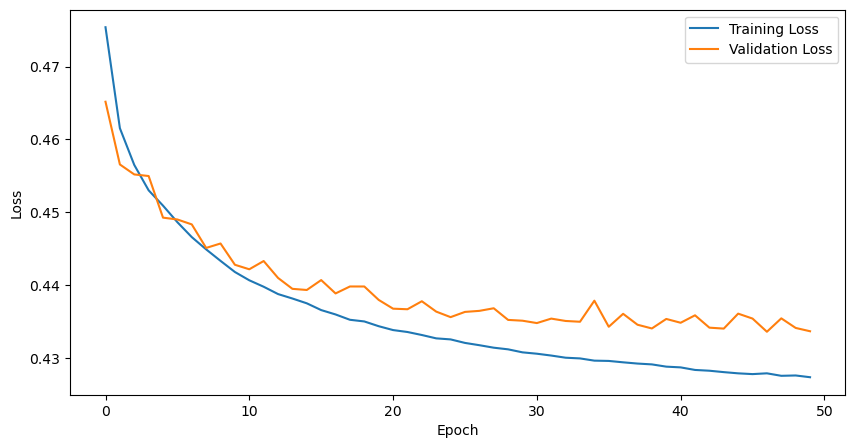

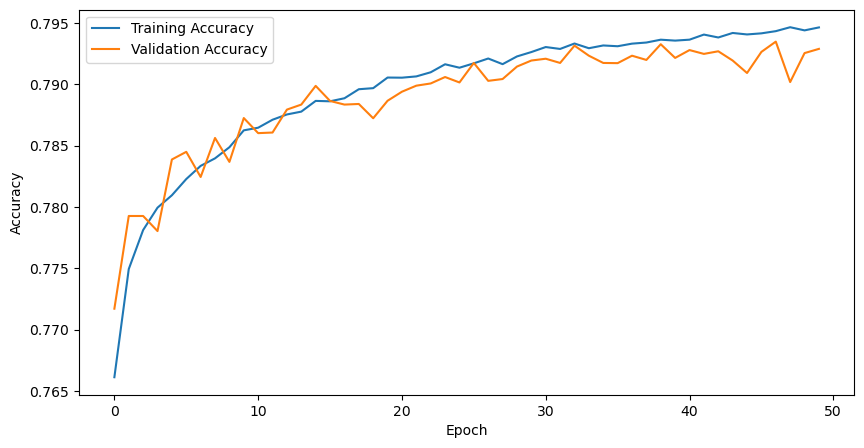

In [105]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [106]:
print("Accuracy on test set:", score[1])
print("Loss on test set:", score[0])

Accuracy on test set: 0.7890527844429016
Loss on test set: 0.43612420558929443


In [109]:
LR_results_df = LR_results_df.add_prefix('LR_')
DT_results_df = DT_results_df.add_prefix('DT_')
KNN_results_df = KNN_results_df.add_prefix('KNN_')

In [130]:
RESULTS_DF = pd.concat([LR_results_df, DT_results_df, KNN_results_df], axis=1)
RESULTS_DF

,LR_Threshold,LR_Precision,LR_Recall,LR_Accuracy,DT_Threshold,DT_Precision,DT_Recall,DT_Accuracy,Threshold,Precision,Recall,Accuracy
0,0.1,0.655709,0.992682,0.681581,0.1,0.685685,0.978226,0.716365,0.1,0.670721,0.987743,0.700171
1,0.2,0.682311,0.976216,0.711839,0.2,0.716398,0.962337,0.747469,0.2,0.697270,0.974398,0.729432
2,0.3,0.695955,0.960055,0.723255,0.3,0.742878,0.939073,0.767178,0.3,0.720733,0.953293,0.749071
3,0.4,0.711232,0.935802,0.732427,0.4,0.770667,0.905706,0.780535,0.4,0.746889,0.914273,0.761449
4,0.5,0.731638,0.894202,0.738666,0.5,0.802631,0.856089,0.786197,0.5,0.779229,0.860894,0.769015
5,0.6,0.766295,0.803531,0.734002,0.6,0.851269,0.765971,0.778095,0.6,0.813174,0.782565,0.760443
6,0.7,0.829482,0.658637,0.712778,0.7,0.880161,0.700933,0.762021,0.7,0.851432,0.675007,0.732975
7,0.8,0.890208,0.408381,0.613238,0.8,0.905424,0.619831,0.731612,0.8,0.885078,0.544604,0.682719
8,0.9,0.920000,0.048341,0.424145,0.9,0.934737,0.440683,0.644039,0.9,0.918413,0.359225,0.594323


Here we have collected the precision, recall and accuracy of all our supervised machine learning models.

---

# Findings 

The best performing model was our Neural Network with an overall accuracy score of 0.789. Our best performing supervised model was a decision tree which scored 0.786 and our efforts to experiment with unsupervised learning models was almost entirely a waste of time. Looking at the table above we can optimise the precision of all our models by increasing the decision threshold to 0.6 without having too much negative impact on overall accuracy. The decision tree model is still producing a greater overall accuracy at a decision threshold of 0.7 when compared to our baseline logisitic regression model.

Tree based models seem to be the best suited to our classification problem, and they are not overly complex or computationally heavy.